#📌 Extracción

In [1]:
import requests
import pandas as pd
import numpy as np


In [2]:
#procedemos a extraer la data json
url ='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
reponse = requests.get(url)
df = pd.DataFrame(reponse.json())
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
#procedemos a normalizar los datos para obtener todos los datos
df_norm= pd.json_normalize(reponse.json())
df_norm.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [4]:
# Verificamos la dimensión del DATAFRAME
df_norm.shape

(7267, 21)

In [5]:
# Verificamos la informacion con el que cuenta
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
#Verificamos con que tipo de datos contamos y mustra como ejemplo los 10 primeros
for col in df_norm.columns:
  print(f'{col}:{df_norm[col].nunique()}  valores únicos')
  #if df_norm[col].nunique() < 50:
  print(df_norm[col].unique()[:10])
  print('-' * 20)

customerID:7267  valores únicos
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
--------------------
Churn:3  valores únicos
['No' 'Yes' '']
--------------------
customer.gender:2  valores únicos
['Female' 'Male']
--------------------
customer.SeniorCitizen:2  valores únicos
[0 1]
--------------------
customer.Partner:2  valores únicos
['Yes' 'No']
--------------------
customer.Dependents:2  valores únicos
['Yes' 'No']
--------------------
customer.tenure:73  valores únicos
[ 9  4 13  3 71 63  7 65 54 72]
--------------------
phone.PhoneService:2  valores únicos
['Yes' 'No']
--------------------
phone.MultipleLines:3  valores únicos
['No' 'Yes' 'No phone service']
--------------------
internet.InternetService:3  valores únicos
['DSL' 'Fiber optic' 'No']
--------------------
internet.OnlineSecurity:3  valores únicos
['No' 'Yes' 'No internet service']
--------------------
internet.OnlineBackup:3  valores

In [7]:
#Verificamos si existe datos duplicados
df_norm.duplicated().sum()


np.int64(0)

In [8]:
# Verificamos si tenemos valores Nulos
df_norm.isnull().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [9]:
# Verificamos si tenemos valores Vacios o en blanco
df_norm.apply(lambda x: x.astype(str).str.strip() == '').sum()


,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [10]:
# PROCEDEMOS A LAS TRANSFORMACIONES DE LOS DATOS

#Empezamos con account.carges.Total a Float,  pero como apreciamos que tiene valones vacios procedemos a la limpieza
df_norm = df_norm.dropna(subset=['account.Charges.Total'])


In [11]:
# convertimos a dato numerico el Valor total pagado
df_norm['account.Charges.Total'] = pd.to_numeric(df_norm['account.Charges.Total'], errors='coerce')

In [12]:
# Procedemos a eliminar las filas que contienen dato vacio en Churn
df_norm = df_norm[df_norm['Churn'].str.strip() != '']

In [13]:
# Creamos una Columna donde nos figure el importe diario
df_norm['cuenta_diaria'] = df_norm['account.Charges.Monthly'] / 30
df_norm.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [14]:
# Cambiamos los nombres de las columnas a Español para entender
columnas = {
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensual',
    'account.Charges.Total': 'total_cobrado'
}
df_norm = df_norm.rename(columns=columnas)
df_norm.head(5)

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [15]:
# Ahora cambiamos los datos al español
df_norm['Churn'] = df_norm['Churn'].replace({'Yes': 'Si'})
df_norm['genero'] = df_norm['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df_norm['tiene +60'] = df_norm['tiene +60'].replace({1: 'Si', 0: 'No'})
df_norm['posee_pareja'] = df_norm['posee_pareja'].replace({'Yes': 'Si'})
df_norm['posee_dependientes'] = df_norm['posee_dependientes'].replace({'Yes': 'Si'})
df_norm['servicio_telefono'] = df_norm['servicio_telefono'].replace({'Yes': 'Si'})
df_norm['multiples_lineas'] = df_norm['multiples_lineas'].replace({'Yes': 'Si', 'No phone service': 'Sin servicio de telefono'})
df_norm['tipo_contrato'] = df_norm['tipo_contrato'].replace({'Month-to-month': 'Mensual', 'One year': 'Anual', 'Two year': 'Dos años'})
df_norm

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuenta_diaria
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,No,No,No,13,Si,No,DSL,...,No,Yes,No,No,Anual,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,No,Si,No,22,Si,Si,Fiber optic,...,No,No,No,Yes,Mensual,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,No,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,No,Si,Si,67,Si,No,DSL,...,Yes,Yes,No,Yes,Dos años,No,Mailed check,67.85,4627.65,2.261667


In [16]:
df_norm['factura_digital'] = df_norm['factura_digital'].replace({'Yes': 'Si'})
df_norm['metodo_pago'] = df_norm['metodo_pago'].replace({'Electronic check': 'Transferencia electronica', 'Mailed check':'Cheque enviado por correo', 'Bank transfer (automatic)': 'Transferencia bancaria automatica', 'Credit card (automatic)': 'Tarjeta de credito automatica'})


In [17]:
colum_traducir= ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'Yes': 'Si', 'No': 'No', 'No internet service': 'Sin servicio de internet'}
for columna in colum_traducir:
    df_norm[columna] = df_norm[columna].replace(mapeo)

df_norm

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuenta_diaria
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Transferencia electronica,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Transferencia electronica,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,No,No,No,13,Si,No,DSL,...,No,Si,No,No,Anual,No,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,No,Si,No,22,Si,Si,Fiber optic,...,No,No,No,Si,Mensual,Si,Transferencia electronica,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,No,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Si,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,No,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Dos años,No,Cheque enviado por correo,67.85,4627.65,2.261667


In [18]:
#Verificamos con que tipo de datos contamos y mustra como ejemplo los 10 primeros
for col in df_norm.columns:
  print(f'{col}:{df_norm[col].nunique()}  valores únicos')
  #if df_norm[col].nunique() < 50:
  print(df_norm[col].unique()[:10])
  print('-' * 20)

id:7043  valores únicos
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
--------------------
Churn:2  valores únicos
['No' 'Si']
--------------------
genero:2  valores únicos
['Femenino' 'Masculino']
--------------------
tiene +60:2  valores únicos
['No' 'Si']
--------------------
posee_pareja:2  valores únicos
['Si' 'No']
--------------------
posee_dependientes:2  valores únicos
['Si' 'No']
--------------------
tiempo_contrato:73  valores únicos
[ 9  4 13  3 71 63  7 65 54 72]
--------------------
servicio_telefono:2  valores únicos
['Si' 'No']
--------------------
multiples_lineas:3  valores únicos
['No' 'Si' 'Sin servicio de telefono']
--------------------
tipo_internet:3  valores únicos
['DSL' 'Fiber optic' 'No']
--------------------
seguridad_online:3  valores únicos
['No' 'Si' 'Sin servicio de internet']
--------------------
backup_online:3  valores únicos
['Si' 'No' 'Sin servicio de internet']
-

#📊 Carga y análisis

In [19]:
df_norm.describe()

,tiempo_contrato,valor_mensual,total_cobrado,cuenta_diaria
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158723
std,24.559481,30.090047,2266.771362,1.003002
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.500000,401.450000,1.183333
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.850000,3794.737500,2.995000
max,72.000000,118.750000,8684.800000,3.958333


/tmp/ipython-input-1023434863.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, churn_counts[i]+50, f'{porcentaje:.1f}%', ha='center', va='bottom')


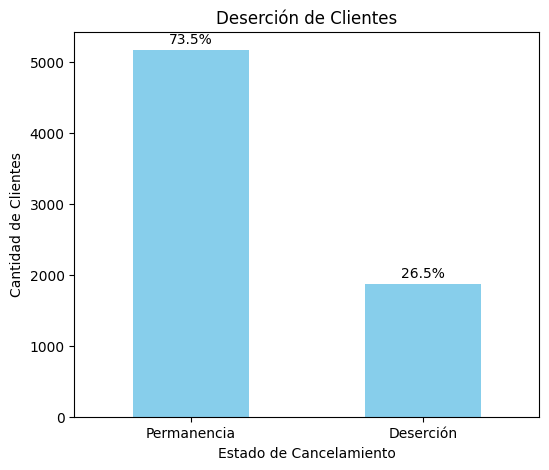

In [20]:
# Veamos el porcentaje de Deserción
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 5))
churn_counts = df_norm['Churn'].value_counts()
churn_porcentaje = churn_counts / len(df_norm) * 100

ax = churn_counts.plot(kind='bar', color='skyblue')
plt.title('Deserción de Clientes')
plt.xlabel('Estado de Cancelamiento')
plt.ylabel('Cantidad de Clientes')
ax.set_xticklabels(['Permanencia', 'Deserción'])
plt.xticks(rotation=0)

for i, porcentaje in enumerate(churn_porcentaje):
    ax.text(i, churn_counts[i]+50, f'{porcentaje:.1f}%', ha='center', va='bottom')

plt.show()


In [21]:
import plotly.express as px
fig = px.histogram(df_norm, x='genero', text_auto= True, color='Churn', barmode='group')
fig.update_layout(width = 600, height=500, title_text='Distribución de Género', xaxis_title='Género', yaxis_title='Cantidad de Clientes')
fig.for_each_trace(lambda t: t.update(name ='Permanencia' if t.name == 'No' else 'Deserción'))
fig.show()

In [22]:
# ahora verificamos por tipo de contrato
ticon=px.histogram(df_norm, x='tipo_contrato', text_auto= True, color='Churn', barmode='group')
ticon.update_layout(width = 600, height=500, title_text='Distribución por Tipo de Contrato', xaxis_title='Tipo de Contrato', yaxis_title='Cantidad de Clientes')
ticon.for_each_trace(lambda t: t.update(name ='Permanencia' if t.name == 'No' else 'Deserción'))
ticon.show()

In [23]:
# Analizamos por tipo de servicio de internet que dispone el cliente
ti_inter=px.histogram(df_norm, x='tipo_internet', text_auto= True, color='Churn', barmode='group')
ti_inter.update_layout(width = 600, height=500, title_text='Distribución por Tipo de Servicio de Internet', xaxis_title='Cantidad Clientes')
ti_inter.for_each_trace(lambda t: t.update(name ='Permanencia' if t.name == 'No' else 'Deserción'))
ti_inter.show()


In [24]:
# Analizamos por el tipo de Pago
tipago=px.histogram(df_norm, x='metodo_pago', text_auto= True, color='Churn', barmode='group')
tipago.update_layout(width =800, height=500, title_text='Distribución por Metodo de Pago', xaxis_title='Metodo de pago', yaxis_title='Cantidad de Clientes')
tipago.for_each_trace(lambda t: t.update(name ='Permanencia' if t.name == 'No' else 'Deserción'))
tipago

<Axes: title={'center': 'Relación entre Tiempo de Contrato y Cuenta Diaria'}, xlabel='Tiempo de Contrato', ylabel='Pago Diario'>

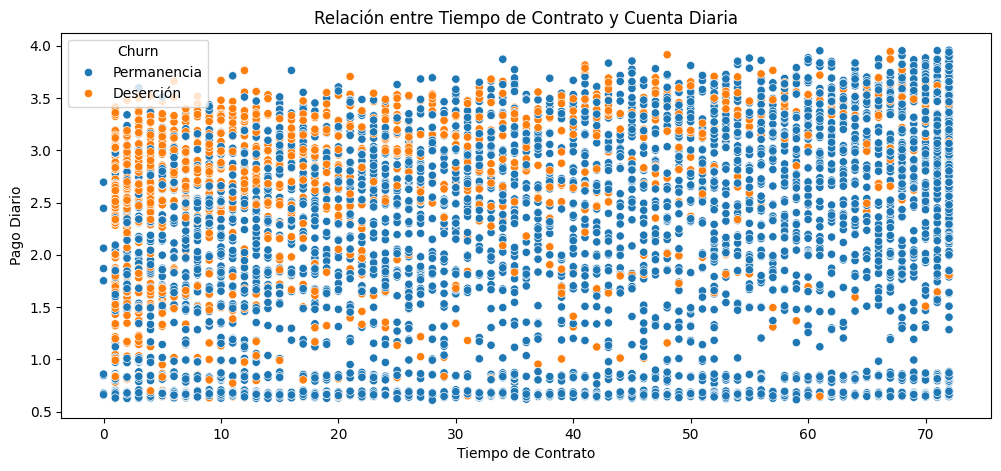

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
scacontrato = sns.scatterplot(data=df_norm, x='tiempo_contrato', y='cuenta_diaria', hue='Churn')
scacontrato.set_title('Relación entre Tiempo de Contrato y Cuenta Diaria')
scacontrato.set_xlabel('Tiempo de Contrato')
scacontrato.set_ylabel('Pago Diario')
new_leyenda= {'No':'Permanencia', 'Si':'Deserción'}
for t in scacontrato.get_legend().get_texts():
  if t.get_text() in new_leyenda:
    t.set_text(new_leyenda[t.get_text()])
scacontrato

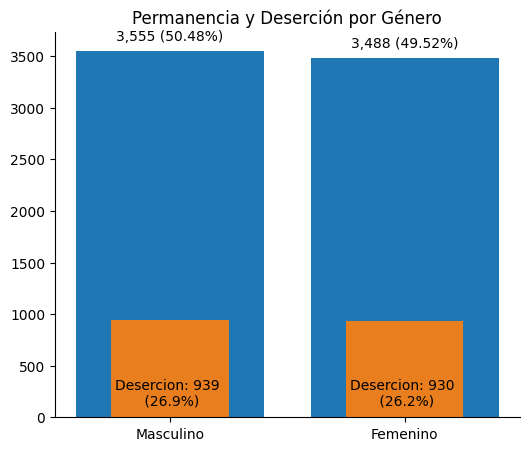

In [26]:
#verificamos los datos
dtgenero = df_norm['genero'].value_counts()
dtgenero_porcentaje = dtgenero / len(df_norm) * 100

dtdesercion = df_norm.groupby('genero')['Churn'].value_counts().loc[:,'Si']
dtdesercion_porcentaje = df_norm.groupby('genero')['Churn'].value_counts(normalize=True).loc[:, 'Si'] * 100

fig, ax=plt.subplots(figsize=(6, 5))
ax.bar(dtgenero.index, dtgenero.values, label='Deserción')
ax.bar(dtgenero.index, dtdesercion.values, label ='+60', width=0.5 , alpha= 0.9)
ax.set_title('Permanencia y Deserción por Género')
for i, (cant, porc) in enumerate(zip(dtgenero.values, dtgenero_porcentaje.values)):
    ax.text(i, cant+0.02 * max(dtgenero.values), f'{cant:,} ({porc:.2f}%)', ha='center', va='bottom')

for i, (cant_churn, porc_churn) in enumerate(zip(dtdesercion.values, dtdesercion_porcentaje.values)):
    ax.text(i, dtdesercion.values[i] *0.25, f'Desercion: {cant_churn:,} \n ({porc_churn:.1f}%)', ha='center', va='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



In [27]:
churn_counts2 = df_norm['genero'].value_counts()
churn_porcentaje2 = churn_counts2 / len(df_norm) * 100

#verificamos los datos
dtgenero = df_norm['genero'].value_counts()
dtgenero_porcentaje = dtgenero / len(df_norm) * 100

dtdesercion = df_norm.groupby('genero')['Churn'].value_counts().loc[:,'Si']
dtdesercion_porcentaje = df_norm.groupby('genero')['Churn'].value_counts(normalize=True).loc[:, 'Si'] * 100

print( dtgenero)
print(dtgenero_porcentaje)
print(dtdesercion)
print(dtdesercion_porcentaje)

genero
Masculino    3555
Femenino     3488
Name: count, dtype: int64
genero
Masculino    50.47565
Femenino     49.52435
Name: count, dtype: float64
genero
Femenino     939
Masculino    930
Name: count, dtype: int64
genero
Femenino     26.920872
Masculino    26.160338
Name: proportion, dtype: float64


In [28]:
# para realizar el mapar de correlación
cols_tofix = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
for col in cols_tofix:
  df_norm[col] = df_norm[col].replace({'Sin servicio de internet': 'No'})




In [28]:
#Verificamos con que tipo de datos contamos y mustra como ejemplo los 10 primeros
for col in df_norm.columns:
  print(f'{col}:{df_norm[col].nunique()}  valores únicos')
  #if df_norm[col].nunique() < 50:
  print(df_norm[col].unique()[:10])
  print('-' * 20)

id:7043  valores únicos
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
--------------------
Churn:2  valores únicos
['No' 'Si']
--------------------
genero:2  valores únicos
['Femenino' 'Masculino']
--------------------
tiene +60:2  valores únicos
['No' 'Si']
--------------------
posee_pareja:2  valores únicos
['Si' 'No']
--------------------
posee_dependientes:2  valores únicos
['Si' 'No']
--------------------
tiempo_contrato:73  valores únicos
[ 9  4 13  3 71 63  7 65 54 72]
--------------------
servicio_telefono:2  valores únicos
['Si' 'No']
--------------------
multiples_lineas:3  valores únicos
['No' 'Si' 'Sin servicio de telefono']
--------------------
tipo_internet:3  valores únicos
['DSL' 'Fiber optic' 'No']
--------------------
seguridad_online:2  valores únicos
['No' 'Si']
--------------------
backup_online:2  valores únicos
['Si' 'No']
--------------------
proteccion_dispositivo:2  valores 

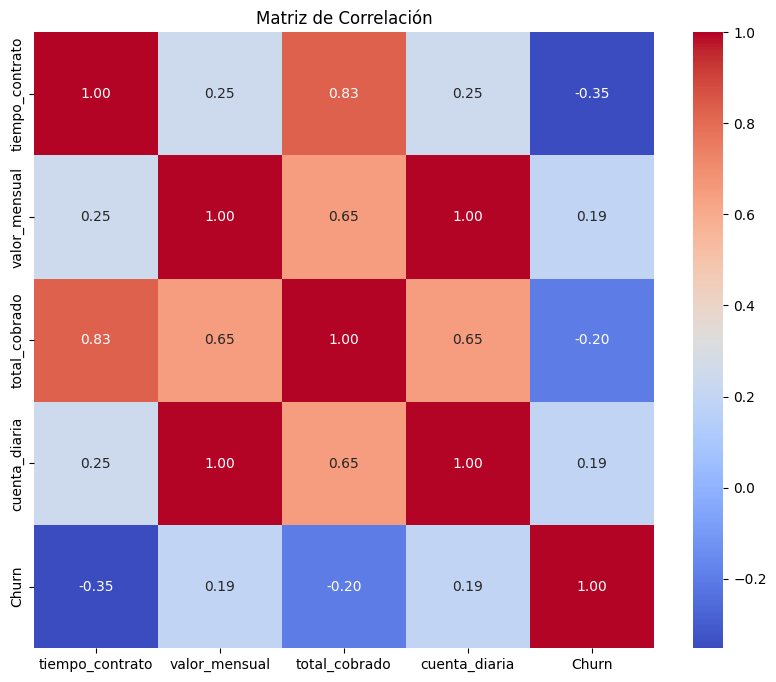

In [29]:
#seleccionamos las variables numericas
df_numeric = df_norm.select_dtypes(include=['int64', 'float64'])
df_numeric['Churn'] = df_norm['Churn'].map({'No': 0, 'Si': 1})

# calculamos la matriz de correlacion
corr_matrix = df_numeric.corr()

#creamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [30]:
#analisis de chrun por categorias variables categoricas
#seleccionar varables categoricas
categorical_cols = df_norm.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Churn')

#tabla de proporcion por categoria
for col in categorical_cols:
  print(f' Analisis de Variable: {col}:')
  display(pd.crosstab(df_norm[col], df_norm['Churn'], normalize='index') * 100)




 Analisis de Variable: id:


Churn,No,Si
id,,
0002-ORFBO,100.0,0.0
0003-MKNFE,100.0,0.0
0004-TLHLJ,0.0,100.0
0011-IGKFF,0.0,100.0
0013-EXCHZ,0.0,100.0
...,...,...
9987-LUTYD,100.0,0.0
9992-RRAMN,0.0,100.0
9992-UJOEL,100.0,0.0


 Analisis de Variable: genero:


Churn,No,Si
genero,,
Femenino,73.079128,26.920872
Masculino,73.839662,26.160338


 Analisis de Variable: tiene +60:


Churn,No,Si
tiene +60,,
No,76.393832,23.606168
Si,58.318739,41.681261


 Analisis de Variable: posee_pareja:


Churn,No,Si
posee_pareja,,
No,67.042021,32.957979
Si,80.335097,19.664903


 Analisis de Variable: posee_dependientes:


Churn,No,Si
posee_dependientes,,
No,68.720860,31.279140
Si,84.549763,15.450237


 Analisis de Variable: servicio_telefono:


Churn,No,Si
servicio_telefono,,
No,75.073314,24.926686
Si,73.290363,26.709637


 Analisis de Variable: multiples_lineas:


Churn,No,Si
multiples_lineas,,
No,74.955752,25.044248
Si,71.390104,28.609896
Sin servicio de telefono,75.073314,24.926686


 Analisis de Variable: tipo_internet:


Churn,No,Si
tipo_internet,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


 Analisis de Variable: seguridad_online:


Churn,No,Si
seguridad_online,,
No,68.670382,31.329618
Si,85.388806,14.611194


 Analisis de Variable: backup_online:


Churn,No,Si
backup_online,,
No,70.827915,29.172085
Si,78.468506,21.531494


 Analisis de Variable: proteccion_dispositivo:


Churn,No,Si
proteccion_dispositivo,,
No,71.348193,28.651807
Si,77.497936,22.502064


 Analisis de Variable: soporte_tecnico:


Churn,No,Si
soporte_tecnico,,
No,68.813763,31.186237
Si,84.833659,15.166341


 Analisis de Variable: streaming_tv:


Churn,No,Si
streaming_tv,,
No,75.668819,24.331181
Si,69.929812,30.070188


 Analisis de Variable: streaming_peliculas:


Churn,No,Si
streaming_peliculas,,
No,75.620506,24.379494
Si,70.058565,29.941435


 Analisis de Variable: tipo_contrato:


Churn,No,Si
tipo_contrato,,
Anual,88.730482,11.269518
Dos años,97.168142,2.831858
Mensual,57.290323,42.709677


 Analisis de Variable: factura_digital:


Churn,No,Si
factura_digital,,
No,83.669916,16.330084
Si,66.434908,33.565092


 Analisis de Variable: metodo_pago:


Churn,No,Si
metodo_pago,,
Cheque enviado por correo,80.893300,19.106700
Tarjeta de credito automatica,84.756899,15.243101
Transferencia bancaria automatica,83.290155,16.709845
Transferencia electronica,54.714588,45.285412


In [34]:
#Metodo  Qui-Cuadrado
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
#crer una copia
df_rank= df_norm.copy()
#convertir Churn en binario
df_rank['Churn'] = df_rank['Churn'].map({'No': 0, 'Si': 1})
#separar variables categoricas
categorical_cols = df_rank.select_dtypes(include=['object']).columns
# aplicar label encoding temporal
le = LabelEncoder()
for col in categorical_cols:
  df_rank[col] = le.fit_transform(df_rank[col])

# Separa X de Y
X_cat = df_rank[categorical_cols]
y = df_rank['Churn']

#Aplicamos test qui-cuarado
chi_scores, p_values = chi2(X_cat, y)

# Crea un DataFrame para mostrar los resultados
chi_df = pd.DataFrame({'Variable': categorical_cols, 'Chi2-cuadrado': chi_scores, 'p-value': p_values})

#ordenar por importancia
chi_df = chi_df.sort_values(by='Chi2-cuadrado', ascending=False)

# Mostrar el resultado
chi_df


,Variable,Chi2-cuadrado,p-value
0,id,2516.968803,0.000000e+00
14,tipo_contrato,393.849408,1.201896e-87
16,metodo_pago,320.245959,1.280343e-71
8,seguridad_online,147.295858,6.761696e-34
11,soporte_tecnico,135.559783,2.490549e-31
2,tiene +60,134.351545,4.576959e-31
4,posee_dependientes,133.036443,8.876729e-31
15,factura_digital,105.680863,8.661987e-25
3,posee_pareja,82.412083,1.104764e-19
9,backup_online,31.217694,2.306541e-08


El metodo de Pago con Mayor deserción es por **Transferencia electronica**, contra los de menor deserción es la *Transferencia Bancaria automatica* y la *tarjeta de credito automatica*.

In [ ]:
# Explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato",
# se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.
import plotly.express as px
fig = px.histogram  (df_norm, x='total_cobrado', text_auto= True, color='Churn', barmode='group')
fig.update_layout(width =1300, height=500, title_text='Distribución por Total Gastado', xaxis_title='Gasto de cliente',yaxis_title='Cantidad de Clientes')
fig.for_each_trace(lambda t: t.update(name ='Permanencia' if t.name == 'No' else 'Deserción'))
fig.show()

In [ ]:
# Analizamos por tiempo de contrato
hist=px.histogram(df_norm, x='tiempo_contrato', text_auto= True, color='Churn', barmode='group')
hist.update_layout(width = 1300, height=500, title_text='Distribución por Tiempo de Contrato', xaxis_title='Tiempo de Contrato', yaxis_title='Cantidad de Clientes')
hist.for_each_trace(lambda t: t.update(name ='Permanencia' if t.name == 'No' else 'Deserción'))
hist.show()

#📄Informe final

El presente Informe se analiza diferentes puntos en las que los clientes de Churn enfrenta una alta tasa de cancelaciones, analizamos los factores que conlleva a la perdida del cliente.



*   Limpieza y tratamiento de datos\
En el presente analisis de procedio a la optencion de de datos en formato JSON, el mismo que se procedio a la Normalizacion de los Datosn para luego realizar la Limpieza de los datos Nulos y/o vacios, modifcando el tipo de dato que pertenece es decir si se tenia datos Numericos en texto, esta se corregio dandole el formato que le corresponde.




*   Analisis Exploratorio de Datos\
Se realizo diversos graficos para saber el o los motivos que la que presenta la alta tasa de deserción



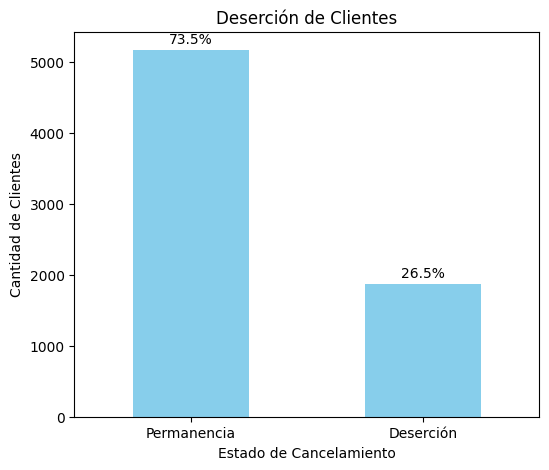

Distribución por Género\
Se puede apreciar una diferencia minina de tasa de deserción entre hombres 26.16% y Mujeres 26.92%.



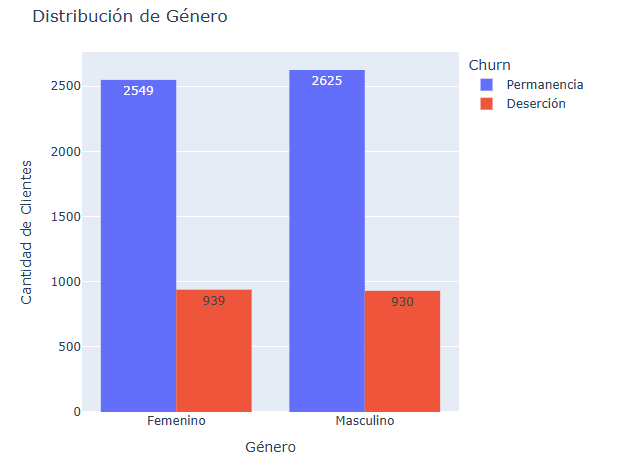

Por Tipo de Contrato.


*  Contrato por mes: Este tipo de Contrato tiene una alta tasa de Deserción  
*  Contrato por 1 año:  Su deserción es baja
*  Contrato por 2 Años: La tasa de Deserción es muy baja


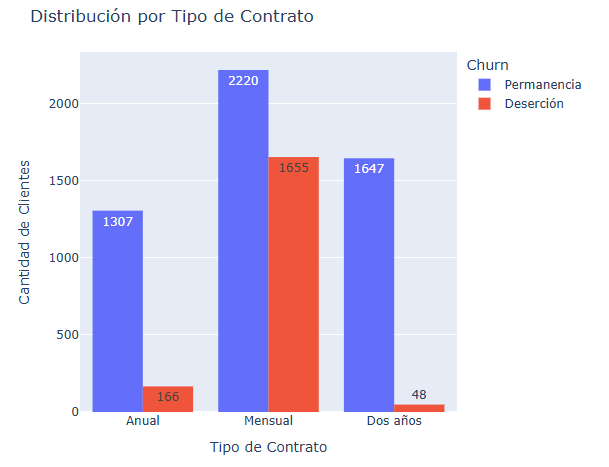




Tiempo de Contrato.\
Se puede apreciar de que el porcentaje de Deserción es muy alto  los contratos menores de 2 meses, tal como se muestra en el grafico.


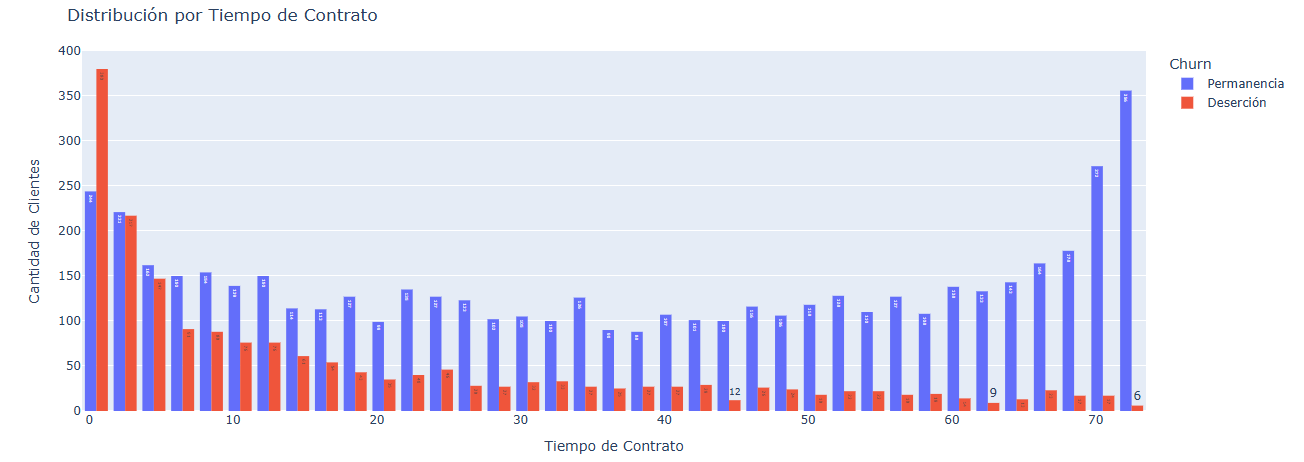



Metodo de pago.\
se puede apreciar que los pagos por Transferencia Electrónica tienen una mayor porcentaje de Deserción.


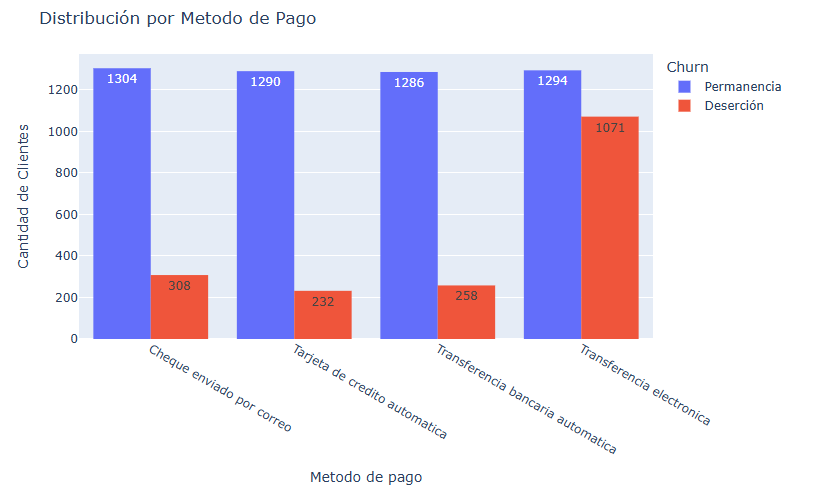

En el siguiente grafico de dispersion muestra la deserción dentro de los primeros meses


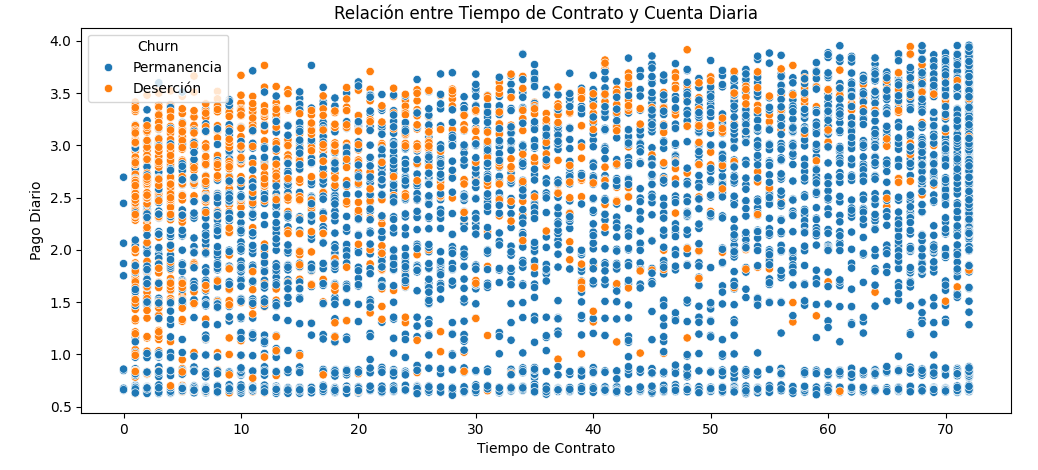

# Conclusiones e Insights


despues de analizar la información recibida, podemos apreciar y concluir que la Deserción esta vinculada con el Tipo de Contrato, el Metodo de pago y el Tipo de Servicio.\
por tanto los los servicios con pagos Automatizados ayudan a mantener y retener a los clientes.

# Recomendaciones:

- Promover Paquetes de servicio a largo plazo, es decir se podria dar un descuento por un contrato a 1 año o 2 dos años, esto ayudaria a tener mas clientes a permanecer.\
- Incentivar el eso de pago automatizados con tarjeta de credito o transferencia bancaria automatica.\
- Revisar el servicio por Fibra optica, ya que esta presenta un alto porcentaje de deserción.